In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
df = pd.read_csv('iris.csv',header = None)
df.columns = ['separ_length','separ_width','petal_length','petal_width','class']

In [3]:
df.head(10)

,separ_length,separ_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,separ_length,separ_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

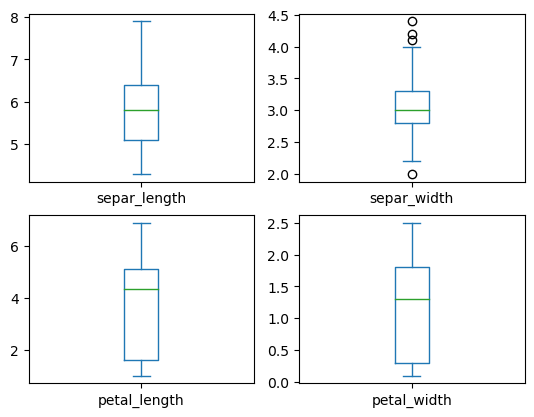

In [7]:
#ploting box plot

df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

In [8]:
#removing outliers from the dataset

Q1 = df.separ_width.quantile(0.25)
Q3 = df.separ_width.quantile(0.75)
IQR = Q3-Q1
df = df[(df.separ_width>=Q1-1.5*IQR) & (df.separ_width<=Q3+1.5*IQR)]

In [9]:
df

,separ_length,separ_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


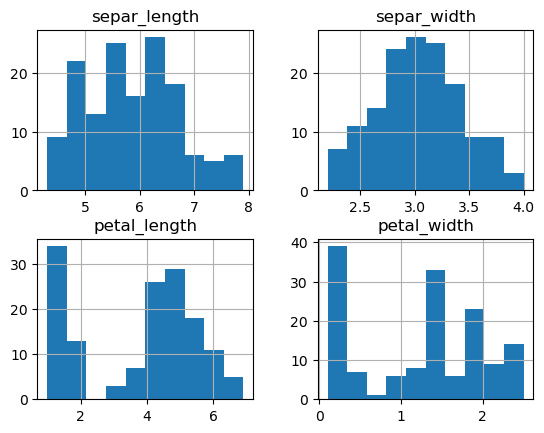

In [10]:
#ploting histogram

df.hist()
plt.show()

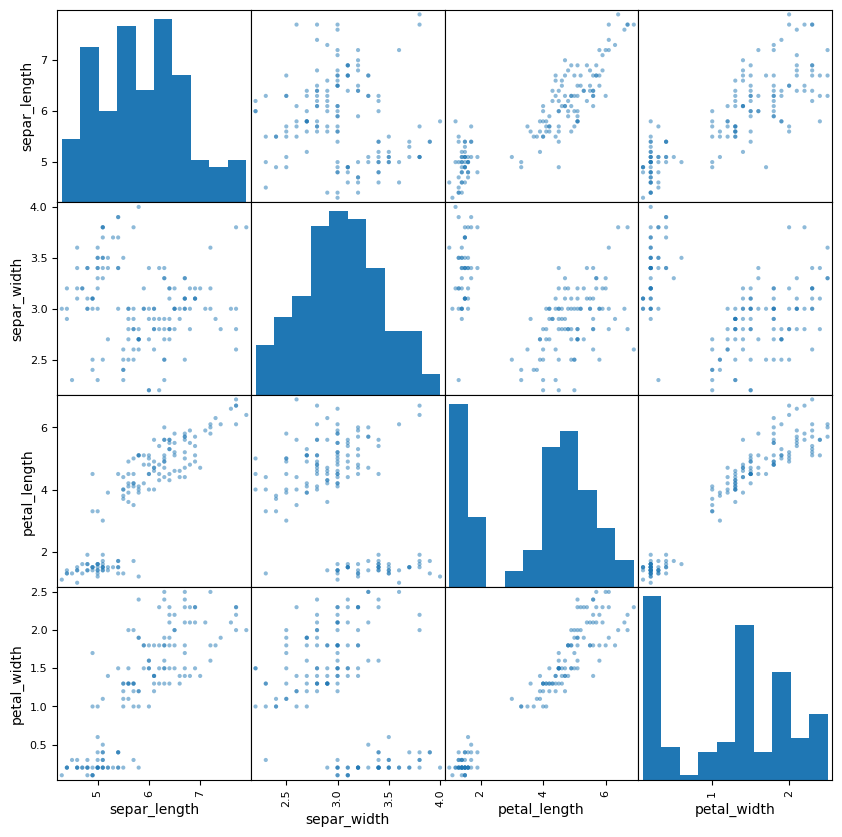

In [11]:
#show scatter matrics

pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.show()

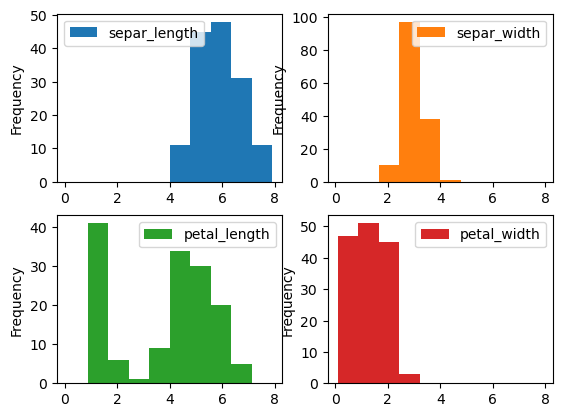

In [12]:
df.plot(kind='hist',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

In [13]:
#spitting dataset

arr = df.values
x = arr[:,:4]
y = arr[:,4]

In [14]:
#changing string labels to number values/labels with the help of LabelEncoder
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [15]:
#importint libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [17]:
#determining shape of splitting dataset
print("shape of x_train = ",x_train.shape)
print("shape of x_test  = ",x_test.shape)
print("shape of y_train = ",y_train.shape)
print("shape of y_test  = ",y_test.shape)

shape of x_train =  (116, 4)
shape of x_test  =  (30, 4)
shape of y_train =  (116,)
shape of y_test  =  (30,)


In [18]:
#import multiple models for comparison

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [19]:
#creating set of models

models = {}
models["LR"] = LogisticRegression()
models["DTR"] = DecisionTreeRegressor()
models["LDA"] = LinearDiscriminantAnalysis()
models["KNC"] = KNeighborsClassifier()
models["GNB"] =  GaussianNB()
models["SVM"] = SVC()

In [20]:
result = []
for key in models:
    kfold = KFold(n_splits=10,random_state=1,shuffle=True)
    cv_results = cross_val_score(models[key],x_train,y_train,cv=kfold,scoring='accuracy')
    result.append(cv_results)
    print('%s : %f (%f)',(key,cv_results.mean(),cv_results.std()))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

%s : %f (%f) ('LR', 0.9742424242424242, 0.03939393939393941)
%s : %f (%f) ('DTR', 0.9742424242424242, 0.03939393939393941)
%s : %f (%f) ('LDA', 0.9833333333333332, 0.03333333333333335)
%s : %f (%f) ('KNC', 0.9651515151515151, 0.04274768478686633)
%s : %f (%f) ('GNB', 0.9575757575757576, 0.05650926120900459)
%s : %f (%f) ('SVM', 0.9651515151515151, 0.04274768478686633)


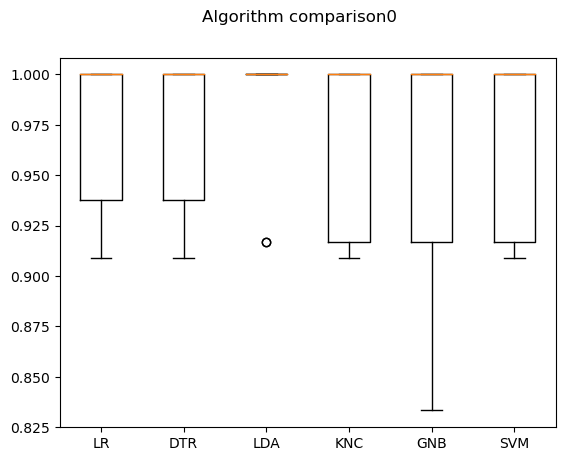

In [21]:
fig = plt.figure()
fig.suptitle("Algorithm comparison0")
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(models.keys())
plt.show()

In [22]:
#importing libraries

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
svm = SVC()
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
print("accuracy : ",accuracy_score(y_test,predictions))
print("confusion matrix:\n",confusion_matrix(y_test,predictions))
print("classification_report:\n",classification_report(y_test,predictions))

accuracy :  0.9666666666666667
confusion matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

